In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
np.__version__

'1.26.4'

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Activation ReLU

In [36]:
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

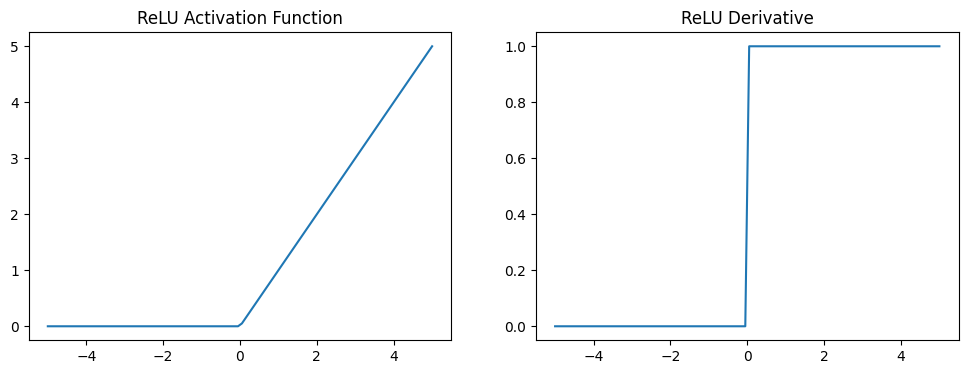

In [37]:
x_values = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, relu(x_values), label='ReLU')
plt.title('ReLU Activation Function')

plt.subplot(1, 2, 2)
plt.plot(x_values, relu_deriv(x_values), label='ReLU Derivative')
plt.title('ReLU Derivative')

plt.show()

### Activation ELU

In [38]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_deriv(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

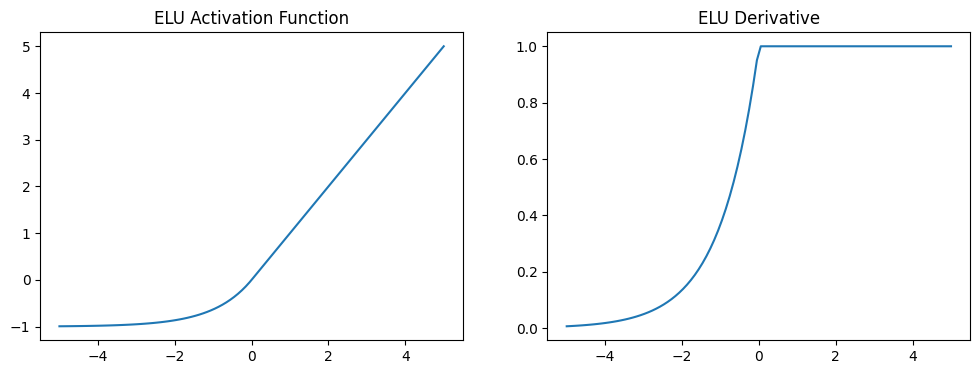

In [39]:
x_values = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, elu(x_values), label='ELU')
plt.title('ELU Activation Function')

plt.subplot(1, 2, 2)
plt.plot(x_values, elu_deriv(x_values), label='ELU Derivative')
plt.title('ELU Derivative')

plt.show()

### Activation SiLU

In [40]:
def silu(x):
    return x * sigmoid(x)

def silu_deriv(x):
    return sigmoid(x) * (1 + x * (1 - sigmoid(x)))

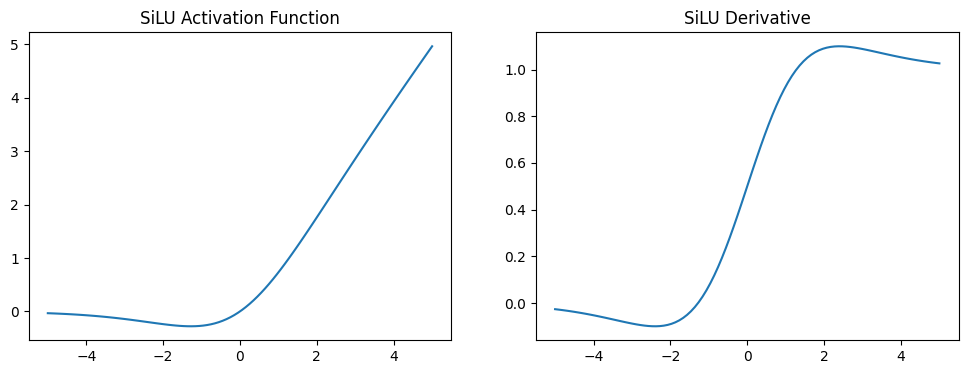

In [41]:
x_values = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, silu(x_values), label='SiLU')
plt.title('SiLU Activation Function')

plt.subplot(1, 2, 2)
plt.plot(x_values, silu_deriv(x_values), label='SiLU Derivative')
plt.title('SiLU Derivative')

plt.show()

### Activation Mish

In [42]:
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def mish_deriv(x):
    exp_x = np.exp(x)
    tanh_x = np.tanh(np.log(1 + exp_x))
    return exp_x * (4 * x + 4 * exp_x + np.exp(2 * x) + 2) / ((1 + exp_x) ** 2 * (2 + exp_x) ** 2)

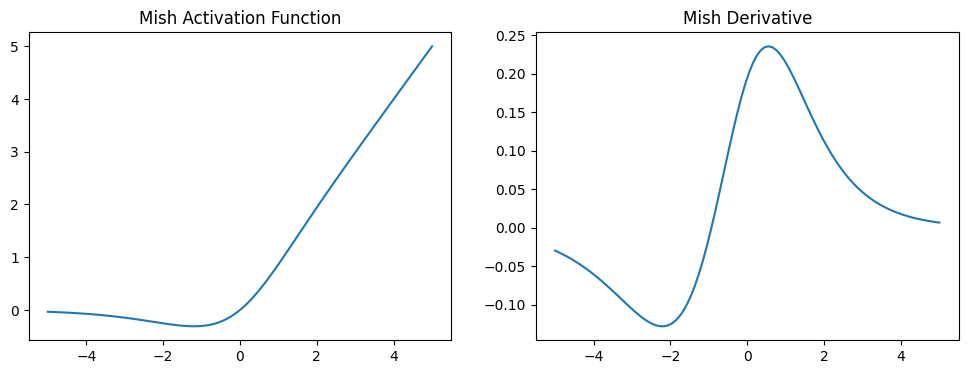

In [43]:
x_values = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, mish(x_values), label='Mish')
plt.title('Mish Activation Function')

plt.subplot(1, 2, 2)
plt.plot(x_values, mish_deriv(x_values), label='Mish Derivative')
plt.title('Mish Derivative')

plt.show()

### Activation Swish

In [44]:
def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def swish_deriv(x, beta=1.0):
    sigmoid_beta_x = sigmoid(beta * x)
    return beta * sigmoid_beta_x + sigmoid_beta_x * (1 - beta * x * sigmoid_beta_x)

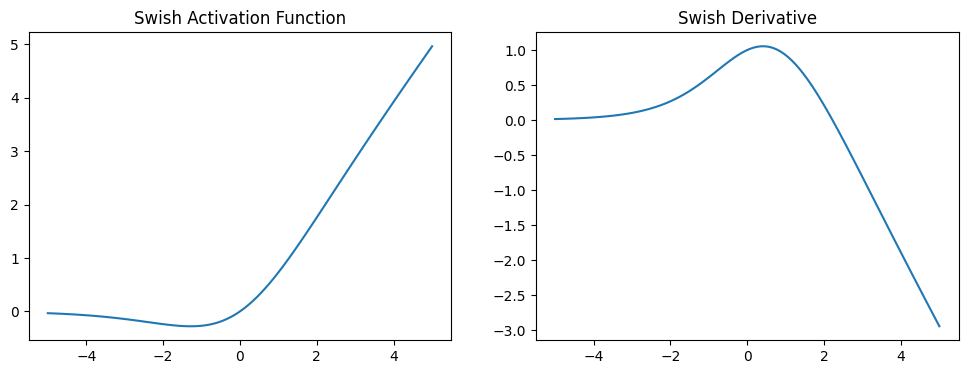

In [45]:
x_values = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, swish(x_values), label='Swish')
plt.title('Swish Activation Function')

plt.subplot(1, 2, 2)
plt.plot(x_values, swish_deriv(x_values), label='Swish Derivative')
plt.title('Swish Derivative')

plt.show()

# Losses

### BCE

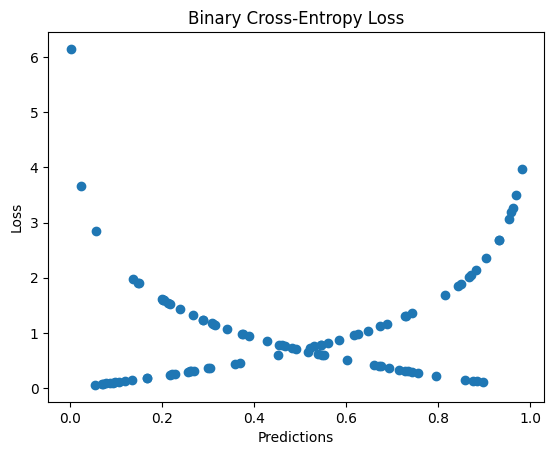

In [65]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

batch_size = 100
y_true = np.random.randint(0, 2, size=(batch_size,))

y_pred = np.random.rand(batch_size,)

bce_loss = binary_cross_entropy(y_true, y_pred)


plt.plot(y_pred, bce_loss, 'o')
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predictions')
plt.ylabel('Loss')
plt.show()

### MSE

0.14938501835977658


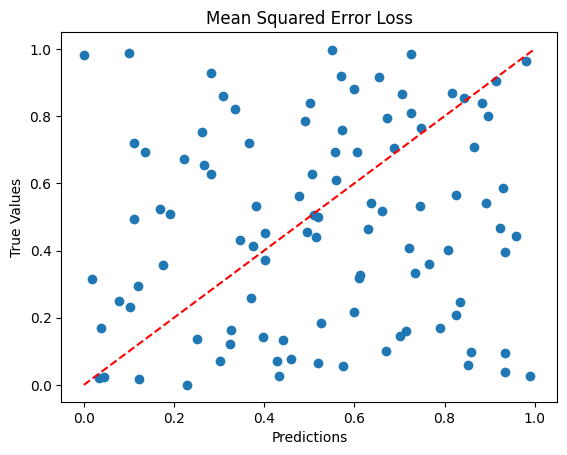

In [64]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

batch_size = 100
y_true = np.random.rand(batch_size,)
y_pred = np.random.rand(batch_size,)

mse_loss = mean_squared_error(y_true, y_pred)
print(mse_loss)

plt.scatter(y_pred, y_true)
plt.plot([0, 1], [0, 1], '--', color='red')
plt.title('Mean Squared Error Loss')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

### SmoothL1

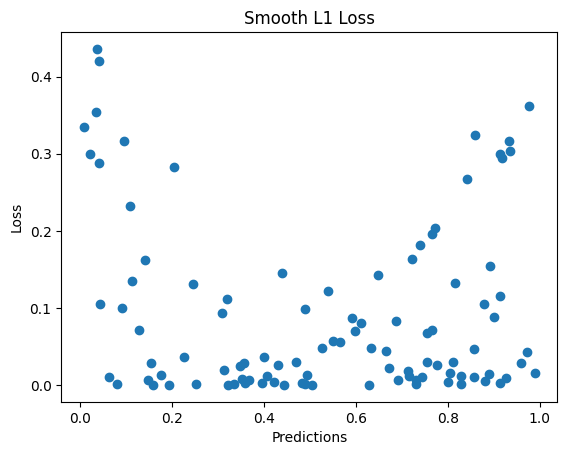

In [63]:
def smooth_l1_loss(y_true, y_pred, delta=1.0):
    diff = np.abs(y_true - y_pred)
    loss = np.where(diff < delta, 0.5 * diff**2, delta * (diff - 0.5 * delta))
    return loss

y_true = np.random.rand(batch_size,)
y_pred = np.random.rand(batch_size,)

smooth_l1_loss_val = smooth_l1_loss(y_true, y_pred)

plt.plot(y_pred, smooth_l1_loss_val, 'o')
plt.title('Smooth L1 Loss')
plt.xlabel('Predictions')
plt.ylabel('Loss')
plt.show()